## Analyze A/B Test Results

<a id='intro'></a>
### Introduction

For this project, I worked to understand the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### Storing Data from "ab_data.csv" into Pandas Dataframe "df"

In [5]:
df = pd.read_csv('ab_data.csv')

### Finding information related to the Dataset - Shape, Fields and related DataTypes, Unique Values etc

In [6]:
df.shape

(294478, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
# Changing timestamp field to Date type as part of Data Clenaing

df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null datetime64[ns]
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


In [11]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [12]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

##### The proportion of users converted.

In [13]:
user_converted_prop = df.query('converted == 1').shape[0]/df.shape[0]

user_converted_prop

0.11965919355605512

#####  The number of times the `new_page` and `treatment` don't match.

In [14]:
df.query('landing_page != "new_page" and group == "treatment"').shape[0] + df.query('landing_page == "new_page" and group != "treatment"').shape[0]

3893

In [15]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

#### Storing the indexes of rows where rows where treatment does not match with new_page or control does not match with old_page in Index variable

In [16]:
index = df.query('(landing_page != "new_page" and group == "treatment") or (landing_page == "new_page" and group != "treatment")').index

In [17]:
df2 = df.drop(index)

In [18]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [19]:
df2.user_id.nunique()

290584

In [20]:
# Finding the user ID which is duplicated 

df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

In [21]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [22]:
df2.drop(df.index[1899], inplace = True)

In [23]:
user_converted_prop = df2.query('converted == 1').shape[0]/df2.shape[0]

user_converted_prop

0.11959708724499628

Given that an individual was in the `control` group, the probablity that they converted.

In [24]:
control_converted_prop = df2.query('group == "control" and converted == 1').shape[0]/df2.query('group == "control"').shape[0]

control_converted_prop

0.1203863045004612

Given that an individual was in the `treatment` group, the probablity that they converted.

In [25]:
treatment_converted_prop = df2.query('group == "treatment" and converted == 1').shape[0]/df2.query('group == "treatment"').shape[0]

treatment_converted_prop

0.11880806551510564

Probability that an individual received the new page 

In [26]:
new_page_prop = df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

new_page_prop

0.5000619442226688

### Calculating the Duration of the experiment using the timestamp field

In [27]:
df2_temp = df2.sort_values(by ='timestamp')

In [28]:
df2_temp = df2_temp.reset_index(drop=True)

df2_temp.head()

,user_id,timestamp,group,landing_page,converted
0,922696,2017-01-02 13:42:05.378582,treatment,new_page,0
1,781507,2017-01-02 13:42:15.234051,control,old_page,0
2,737319,2017-01-02 13:42:21.786186,control,old_page,0
3,818377,2017-01-02 13:42:26.640581,treatment,new_page,0
4,725857,2017-01-02 13:42:27.851110,treatment,new_page,0


In [29]:
df2_temp.tail()

,user_id,timestamp,group,landing_page,converted
290579,799244,2017-01-24 13:41:15.325359,treatment,new_page,0
290580,808330,2017-01-24 13:41:19.152664,control,old_page,0
290581,843121,2017-01-24 13:41:44.097174,treatment,new_page,0
290582,836373,2017-01-24 13:41:52.604673,control,old_page,0
290583,920411,2017-01-24 13:41:54.460509,control,old_page,0


In [30]:
duration = df2_temp['timestamp'][290583] - df2_temp['timestamp'][0]

duration

Timedelta('21 days 23:59:49.081927')

**As per the above calculations the experiment ran for about 21 days, In which 290584 Unique users participated.**

**In that Duration the experiment done was fair as the probablity of an user to see a new page is 0.50 i.e. 50% chance, But around 12% of the users converted.**

**Users converting from Control group were around 12% while the users converting from Treatment group were around 11.8% which is not significanct. So the experiment should be ran for some more time to get significant results**

<a id='ab_test'></a>
### A/B Test

Consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis -:              $p_{new}$ - $p_{old}$ $<= 0$**

**Alternate Hypothesis -:         $p_{new}$ - $p_{old}$ $> 0$**

In [31]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**conversion rate** for $p_{new}$ under the null? 

In [32]:
p_new_rate = df2['converted'].mean()

p_new_rate

0.11959708724499628

**conversion rate** for $p_{old}$ under the null? <br><br>

In [33]:
p_old_rate = df2['converted'].mean()

p_old_rate

0.11959708724499628

$n_{new}$, the number of individuals in the treatment group?

In [34]:
n_new = df2.query('group == "treatment"').shape[0]

n_new

145310

$n_{old}$, the number of individuals in the control group?

In [35]:
n_old = df2.query('group == "control"').shape[0]

n_old

145274

Simulating $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [36]:
new_page_converted = np.random.binomial(n_new,p_new_rate)

new_page_converted

17387

Simulating $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [37]:
old_page_converted = np.random.binomial(n_old,p_old_rate)

old_page_converted

17236

$p_{new}$ - $p_{old}$ for the simulated values from part (e) and (f).

In [38]:
p_new = new_page_converted/n_new

p_old = old_page_converted/n_old

p_new-p_old

0.0010097638728136377

Createing 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [39]:

p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new_rate)
    old_page_converted = np.random.binomial(n_old,p_old_rate)
    p_diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(p_diff)

Ploting a histogram of the **p_diffs**. 

(array([  1.70000000e+01,   1.38000000e+02,   6.05000000e+02,
          1.81200000e+03,   3.02800000e+03,   2.70500000e+03,
          1.27100000e+03,   3.77000000e+02,   4.40000000e+01,
          3.00000000e+00]),
 array([-0.00455148, -0.00360373, -0.00265599, -0.00170824, -0.00076049,
         0.00018725,  0.001135  ,  0.00208275,  0.00303049,  0.00397824,
         0.00492598]),
 <a list of 10 Patch objects>)

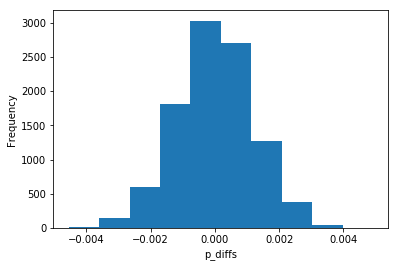

In [40]:
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.hist(p_diffs)

Proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**

In [41]:
orig_p_diff = df[df['landing_page'] == 'new_page']['converted'].mean() -  df[df['landing_page'] == 'old_page']['converted'].mean()

orig_p_diff

-0.0016367945992569882

In [42]:
p_diffs = np.array(p_diffs)

p_diff_proportion = (p_diffs > orig_p_diff).mean()

p_diff_proportion


0.91539999999999999

**The value we have calculated is called p-value. We have considered that the null hypothesis is true. Under this assumption we have done the hypothesis testing and we have calculated the p_diffs i.e. difference in the conversion probabiltiy of p_new and p_old for the simulated sample of ab_data.csv and We have compared this value with the actual diff in ab_test.csv**

**Since the p_value i.e. 0.903 is much much greater than the alpha which is 0.5 that means we do not have enough evidence to reject the null hypothesis**